rambda = 1.00E+02 | weight_norm = 2.440E-02 | training(fitting) / test error = 0.511 / 0.614 
rambda = 1.00E+00 | weight_norm = 7.238E-01 | training(fitting) / test error = 0.285 / 0.318 
rambda = 1.00E-02 | weight_norm = 2.110E+00 | training(fitting) / test error = 0.053 / 0.087 
rambda = 1.00E-04 | weight_norm = 2.186E+00 | training(fitting) / test error = 0.052 / 0.087 
rambda = 1.00E-06 | weight_norm = 2.187E+00 | training(fitting) / test error = 0.052 / 0.087 
rambda = 1.00E-08 | weight_norm = 2.187E+00 | training(fitting) / test error = 0.052 / 0.087 


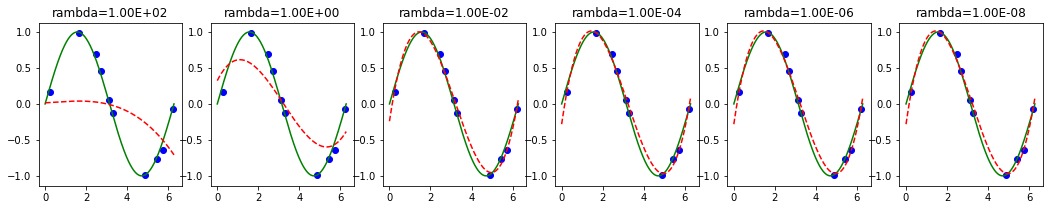

In [72]:
# polynomial_ridge_fitting
# compare the effect of rambda
import numpy as np
import random
import matplotlib.pylab as plt
from sklearn import linear_model
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error

N = 10 # number of sample data
M =  3# dimension of fitting 
noise_power=0.1 # noise strength
div=6 # variety of rambda values
rambda=np.logspace(2,-8, div)
#print(rambda)

random.seed(0)
x = np.linspace(0, 2*np.pi, 1000) #generate  sample data in [0-2pi]
y = np.sin(x)

# sample generation   ##### training data:  (sx, t) #####
sx=random.sample(list(x),N) # sample from x (same meaning as above)
sx = np.sort(sx)
noise = np.random.randn(N) # N(0,1) noise
t = np.sin(sx+noise_power*noise) # observed data

# add one dim for clf (req 2dim matrix)  (N,)->(N,1) tuple
sx=sx.reshape(-1,1) 
t=t.reshape(-1,1)  
x=x.reshape(-1,1)

# Expand 1-dim data to polynomial form X-> X_poly
polynomial_features = PolynomialFeatures(degree=M)
sx_poly = polynomial_features.fit_transform(sx)
x_poly = polynomial_features.fit_transform(x)

#draw figure
fig=plt.figure(figsize=(18.0,3.0)) #define figure size

for i, r in enumerate(rambda):
    #calc (perform regression [with L2-regularizer])
    poly_reg = Ridge(alpha=r, fit_intercept=False)
    reg = poly_reg.fit(sx_poly, t)
    sy_est=poly_reg.predict(sx_poly) #not used
    y_est=poly_reg.predict(x_poly)
    #print(poly_reg.coef_)
    
    #draw
    ax=fig.add_subplot(1,div,i+1)
    ax.plot(x,y,color='green')
    ax.scatter(sx,t, color='blue')
    ax.set_title('rambda={:.2E}'.format(r))
    ax.plot(x,y_est, linestyle='dashed', color='red')

    #calculate RMSE (root mean square error)
    rmse_train=np.sqrt(mean_squared_error(sy_est,t))
    rmse_test=np.sqrt(mean_squared_error(y_est,y))
    weight_norm=np.sqrt(np.sum(np.abs(poly_reg.coef_**2)))
    print("rambda = {:.2E} | weight_norm = {:.3E} | training (fitting) / test error = {:.3f} / {:.3f} ".format(r, weight_norm, rmse_train, rmse_test))
    